In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# 標準ライブラリ
import os
from datetime import datetime, timedelta
from typing import List, Optional
from matplotlib.figure import Figure
from dataclasses import dataclass

# サードパーティライブラリ
import pandas as pd
from pandas import Timedelta
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
from IPython.display import Markdown, display

# プロジェクト内モジュール
import gamedata as g


In [3]:
base_df = g.load_hard_sales()

In [5]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   weekly_id     8564 non-null   object        
 1   begin_date    8564 non-null   datetime64[ns]
 2   end_date      8564 non-null   datetime64[ns]
 3   report_date   8564 non-null   datetime64[ns]
 4   period_date   8564 non-null   int64         
 5   hw            8564 non-null   object        
 6   units         8564 non-null   int64         
 7   adjust_units  8564 non-null   int64         
 8   year          8564 non-null   int64         
 9   month         8564 non-null   int64         
 10  mday          8564 non-null   int64         
 11  week          8564 non-null   int64         
 12  delta_day     8564 non-null   int64         
 13  delta_week    8564 non-null   int64         
 14  delta_month   8564 non-null   int64         
 15  delta_year    8564 non-null   int64   

In [9]:
qhw = g.quarterly_sales(base_df, begin=datetime(2025,1,1), end=datetime(2025,12,31), maker_mode=False)
sqhw = g.style_sales(qhw, columns=['quarterly_units', 'sum_units'], bars=['quarterly_units', 'sum_units'])
sqhw

,quarter,hw,quarterly_units,sum_units
0,2025Q1,NSW,"599,556","599,556"
1,2025Q1,PS4,323,323
2,2025Q1,PS5,"356,773","356,773"
3,2025Q1,XSX,"15,693","15,693"
4,2025Q2,NS2,"1,169,684","1,169,684"
5,2025Q2,NSW,"298,116","897,672"
6,2025Q2,PS4,314,637
7,2025Q2,PS5,"134,500","491,273"
8,2025Q2,XSX,"6,577","22,270"
9,2025Q3,NS2,"939,938","2,109,622"


In [10]:
qmk = g.quarterly_sales(base_df, begin=datetime(2025,1,1), end=datetime(2025,12,31), maker_mode=True)
sqmk = g.style_sales(qmk, columns=['quarterly_units', 'sum_units'], bars=['quarterly_units', 'sum_units'])
sqmk

,quarter,maker_name,quarterly_units,sum_units
0,2025Q1,Microsoft,"15,693","15,693"
1,2025Q1,Nintendo,"599,556","599,556"
2,2025Q1,SONY,"357,096","357,096"
3,2025Q2,Microsoft,"6,577","22,270"
4,2025Q2,Nintendo,"1,467,800","2,067,356"
5,2025Q2,SONY,"134,814","491,910"
6,2025Q3,Microsoft,"3,917","26,187"
7,2025Q3,Nintendo,"1,174,933","3,242,289"
8,2025Q3,SONY,"146,893","638,803"
9,2025Q4,Microsoft,"5,039","31,226"


In [14]:
pvq = g.pivot_quarterly_sales(base_df, hw=[], begin=datetime(2024,1,1), end=datetime(2025,12,31)).fillna(0)
spvq = g.style_sales(pvq)
spvq


hw,3DS,NS2,NSW,PS4,PS5,XSX
quarter,,,,,,
2024Q1,162,0,"721,741","10,003","494,706","29,640"
2024Q2,0,0,"668,652","1,921","296,791","31,325"
2024Q3,0,0,"765,633","1,248","301,788","26,290"
2024Q4,0,0,"953,077",556,"360,864","30,966"
2025Q1,0,0,"599,556",323,"356,773","15,693"
2025Q2,0,"1,169,684","298,116",314,"134,500","6,577"
2025Q3,0,"939,938","234,995",237,"146,656","3,917"
2025Q4,0,"1,674,445","387,717",213,"241,275","5,039"


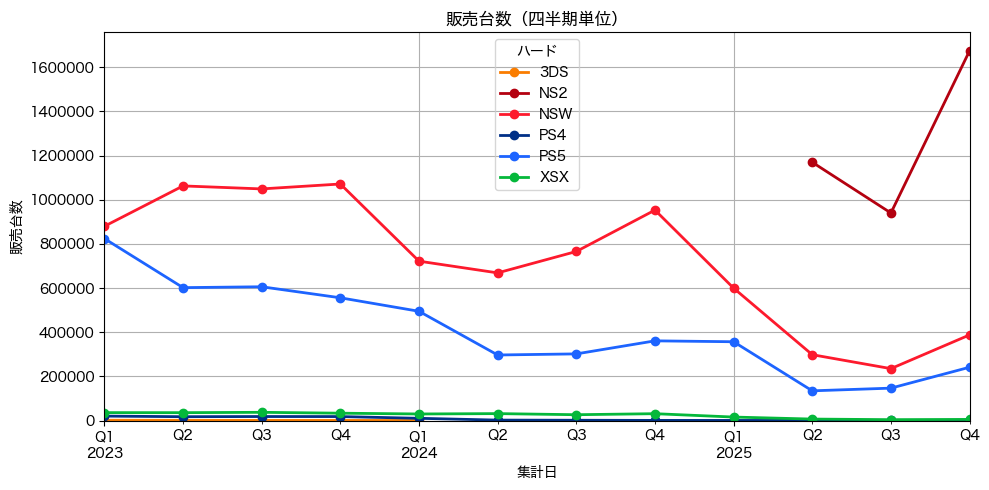

In [17]:
(qpfig, qpdf) = g.plot_sales(hw=[], mode="quarter",
             begin=datetime(2023,1,1), end=datetime(2025,12,31))